In [1]:
import sys
sys.path.insert(1, "../")
from preposessing import*
from scipy import signal

ModuleNotFoundError: No module named 'preposessing'

In [3]:
'../../../5hz_resampled_int_tans/'
''
data=import_file('../../test_data_hardanger/','HB141M-2013-12-05_00-56-08.mat')

In [4]:
simple_time_series=data.convert()
simple_time_series.save('../../test_data_hardanger/testing/')

In [5]:
#Import from where it was saved
name=simple_time_series.series_metadata['file_name']
print(name)

HB141M-2013-12-05_00-56-08


In [6]:
imported_ts=import_converted_ts('../../test_data_hardanger/testing/',name)

In [7]:
plt.figure(figsize=(10,3))
data=imported_ts.ac_data
print('The imported object have 3 attributes, which containes a dictionary each: \n\n.series_metadata : \n')
print(imported_ts.series_metadata)
print('-----------------------------------------')
print('\n.sensor_metadata :\n')
i=0
for key in imported_ts.sensor_metadata.keys():
    print('\nkey = sensor + dir. : ',key)
    # print()
    for key_2 in imported_ts.sensor_metadata.get(key):
        print('     key_2 = ',key_2)
        print('          ',imported_ts.sensor_metadata.get(key).get(key_2))
    i+=1
    if i==4:
        break
print('\n.\n.\n.\n.\n.')
print('-----------------------------------------')
print('.timeseries: ')
print(imported_ts.timeseries)


print('-----------------------------------------')
print('.ac_data: ')
j=0
for key in imported_ts.ac_data.keys():
    print('\nkey: ', key)
    print(imported_ts.ac_data.get(key))
    j+=1
    if j==4:
        break
print('\n.\n.\n.\n.\n.')

The imported object have 3 attributes, which containes a dictionary each: 

.series_metadata : 

{'file_name': 'HB141M-2013-12-05_00-56-08', 'duration': array(1859.99)}
-----------------------------------------

.sensor_metadata :


key = sensor + dir. :  H1_East_x
     key_2 =  component_no
           1.0
     key_2 =  data_quality
           acceptable (value > 5 std detected)
     key_2 =  mean
           0.004091387092051108
     key_2 =  adjusted_samplerate
           20.0

key = sensor + dir. :  H1_East_y
     key_2 =  component_no
           2.0
     key_2 =  data_quality
           acceptable (value > 5 std detected)
     key_2 =  mean
           0.02016170136076543
     key_2 =  adjusted_samplerate
           20.0

key = sensor + dir. :  H1_East_z
     key_2 =  component_no
           3.0
     key_2 =  data_quality
           acceptable (value > 5 std detected)
     key_2 =  mean
           0.011246251509743602
     key_2 =  adjusted_samplerate
           20.0

key = sensor + 

<Figure size 1000x300 with 0 Axes>

In [8]:
tss=get_ts_folder('../../test_data_hardanger/converted_ts/')

In [9]:
idnan = np.array([])
idtot = np.arange(0, len(tss[0].ac_data.get('H1_East_x')))
print(idtot)

for key, item in tss[0].ac_data.items():
    test = np.all(np.isnan(item)==False)
    if not test:
        idnan = np.union1d(np.argwhere(np.isnan(item)), idnan)
        
print(np.setdiff1d(idtot, idnan))


[    0     1     2 ... 37197 37198 37199]
[   11    12    13 ... 37197 37198 37199]


[0.00000000e+00 5.00010753e-02 1.00002151e-01 ... 1.85989000e+03
 1.85994000e+03 1.85999000e+03]


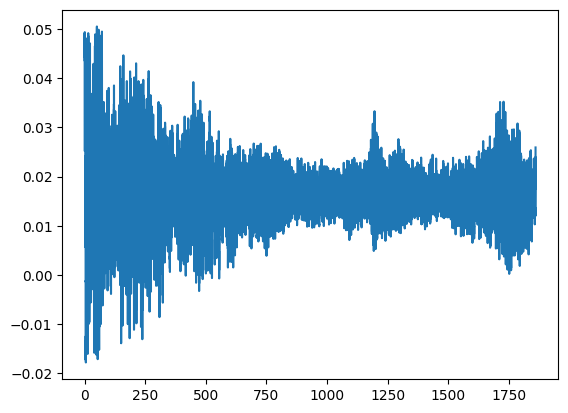

In [10]:
ts1=tss[0]
# print(ts1.ac_data.keys())
ts=ts1.ac_data.get('H5_East_z')
t=ts1.timeseries
print(t)
plt.plot(t,ts)

[0.00000000e+00 5.00010753e-02 1.00002151e-01 ... 1.85989000e+03
 1.85994000e+03 1.85999000e+03]


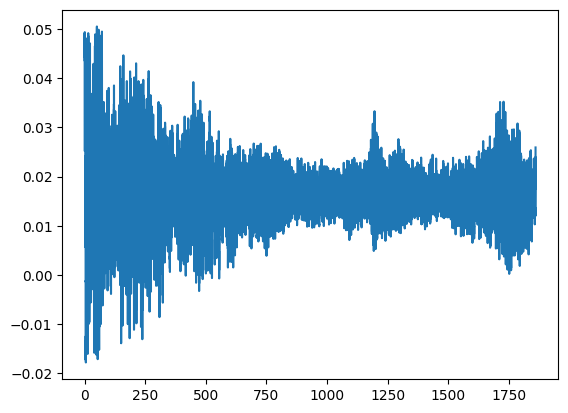

In [11]:
#ts_adjust=adjust_means(ts1)

#ts1.adjust_means()

ts=ts1.ac_data.get('H5_East_z')
t=ts1.timeseries
print(t)
plt.plot(t,ts)

In [12]:
def plot_psd(ts_object, data_key_list, plot_cutoff_percentage):

    t = ts_object.timeseries

    dt = t[1] - t[0]

    Ndivisions = 10
    Nwindow = np.ceil(len(t)/Ndivisions)
    Nfft_pow2 = 2**(np.ceil(np.log2(Nwindow)))

    fig, axs = plt.subplots(len(data_key_list), len(data_key_list), figsize=(15,10), constrained_layout=True)

    for i, k1 in enumerate(data_key_list):
        for j, k2 in enumerate(data_key_list):
            f, S_Hz = signal.csd(ts1.ac_data.get(k1), ts1.ac_data.get(k2), fs = 1/dt, window = 'hann', nperseg = Nwindow, noverlap=None, nfft = Nfft_pow2, return_onesided=True)
            
            axs[i,j].plot(f, np.real(S_Hz))
            axs[i,j].plot(f, np.imag(S_Hz))
            axs[i,j].set_ylabel(k1+" and "+k2)
            axs[i,j].set_xlim([0,plot_cutoff_percentage*f[-1]])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2


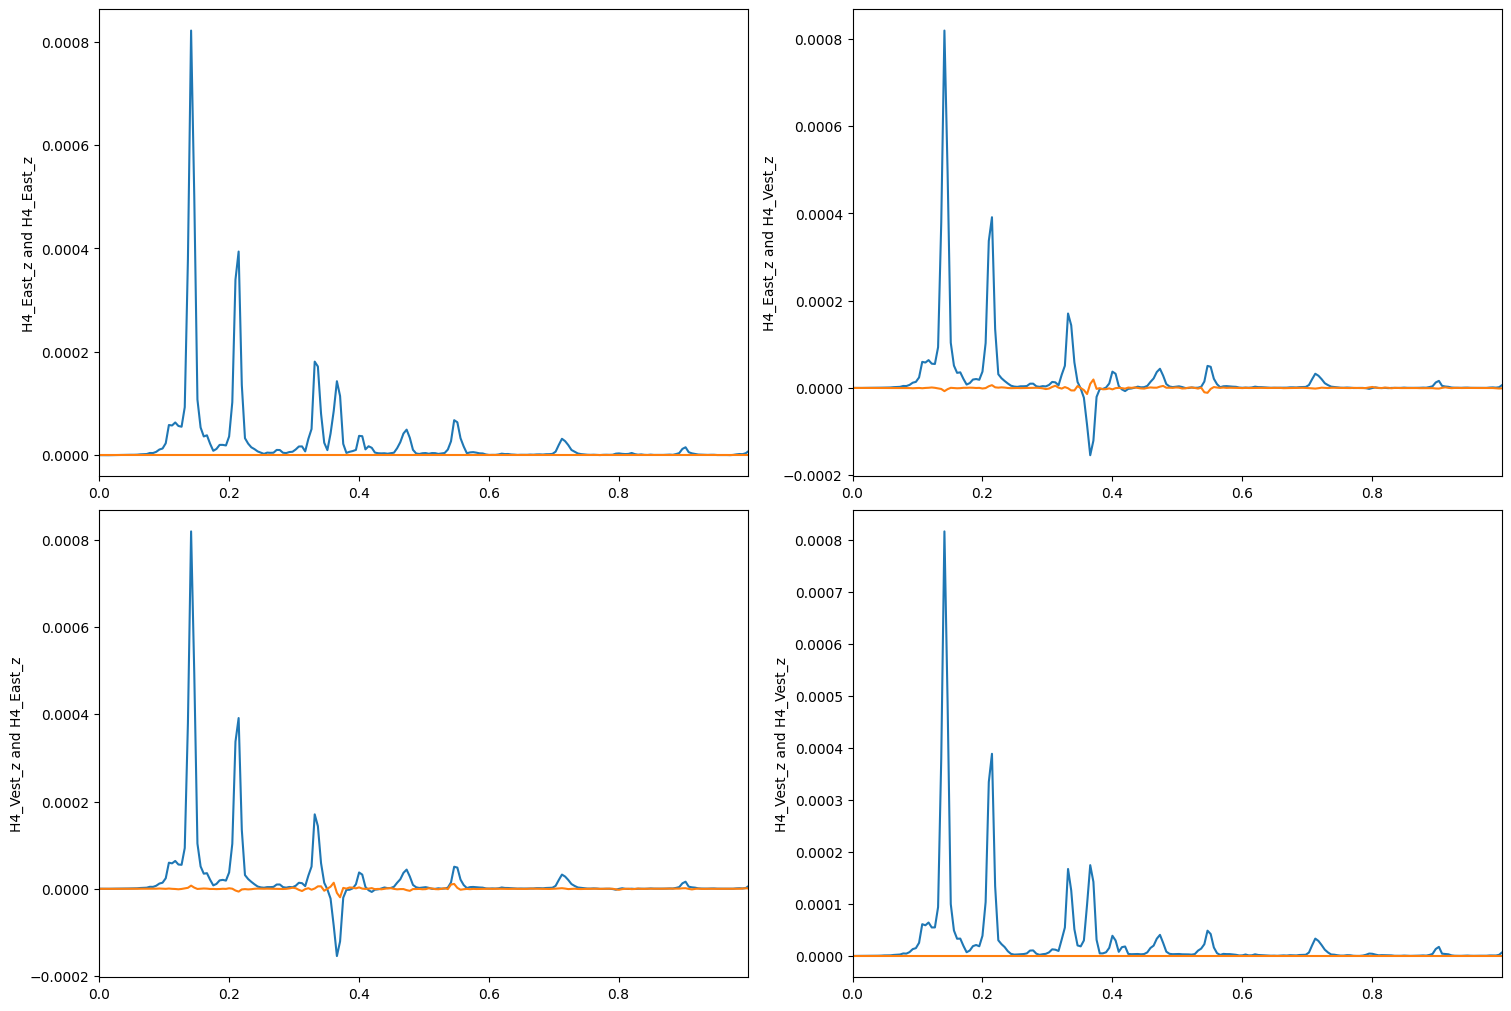

In [17]:
# Load the autoreload extension
%load_ext autoreload

# Autoreload reloads modules before executing code
# 0: disable
# 1: reload modules imported with %aimport
# 2: reload all modules, except those excluded by %aimport
%autoreload 2

#key_list = ['H4_East_z', 'H4_Vest_z', 'H5_East_z', 'H5_Vest_z', 'H6_East_z', 'H6_Vest_z']
key_list = ['H4_East_z', 'H4_Vest_z']
print(len(key_list))
plot_psd(ts1, key_list, 0.1)